In [ ]:
!pip install langdetect

In [7]:
!pip install praw textblob matplotlib seaborn

You should consider upgrading via the 'c:\users\labadmin\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [8]:
import praw
import pandas as pd
from textblob import TextBlob
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Set up Reddit API credentials
reddit = praw.Reddit(
    client_id="tQT8gjNPAUsapQ65e1Ft0Q",
    client_secret="bMA87kb-r0ju1LQehUed4Zzc68JfXg",
    user_agent="python:reddit.sentiment.analysis:v1.0 (by u/ThomasWaugh1702)"
)

# Function to fetch comments from a subreddit
def fetch_topic_comments(topic, subreddit_name="all", post_limit=10):
    comments = []
    subreddit = reddit.subreddit(subreddit_name)
    
    # Search for posts containing the topic
    for post in subreddit.search(topic, limit=post_limit):
        post.comments.replace_more(limit=0)  # Avoid 'MoreComments' objects
        for comment in post.comments.list():
            comments.append(comment)
    
    return comments

# Fetch comments about antimicrobial resistance
topic_comments = fetch_topic_comments("antimicrobial resistance", subreddit_name="science", post_limit=10)

# Display how many comments were fetched
print(f"Fetched {len(topic_comments)} comments related to 'antimicrobial resistance'.")


Fetched 1193 comments related to 'antimicrobial resistance'.


In [10]:
# Function to clean and filter comments
def clean_comments(comments):
    cleaned_comments = []
    for comment in comments:
        try:
            # Remove NAs or empty strings
            if not comment or pd.isna(comment.body):
                continue

            # Remove non-alphabetic characters and extra spaces
            comment_body = re.sub(r"[^a-zA-Z\s]", "", comment.body)
            comment_body = re.sub(r"\s+", " ", comment_body).strip()

            # Convert to lowercase
            comment_body = comment_body.lower()

            # Filter out comments with fewer than 5 words
            if len(comment_body.split()) < 5:
                continue

            cleaned_comments.append(comment_body)
        except Exception as e:
            continue

    return cleaned_comments

# Clean the fetched comments
cleaned_comments = clean_comments(topic_comments)
print(f"Cleaned and retained {len(cleaned_comments)} comments out of {len(topic_comments)}.")


Cleaned and retained 1082 comments out of 1193.


In [11]:
# Function to perform sentiment analysis on cleaned comments
def analyze_sentiment(comments):
    sentiment_data = []
    for comment in comments:
        blob = TextBlob(comment)
        sentiment_data.append({
            "comment": comment,
            "polarity": blob.sentiment.polarity,
            "subjectivity": blob.sentiment.subjectivity
        })
    return pd.DataFrame(sentiment_data)

# Perform sentiment analysis on the cleaned comments
sentiment_df = analyze_sentiment(cleaned_comments)

# Display the first few rows of the sentiment data
sentiment_df.head()


,comment,polarity,subjectivity
0,welcome to rscience this is a heavily moderate...,0.202778,0.513889
1,oh hey its thats thing weve been talking about...,0.000000,0.000000
2,given this was the subject of my phd i feel i ...,0.095076,0.416667
3,i wonder what is going to get us first climate...,0.125000,0.229167
4,humanity ultimate talent of shooting itself in...,0.000000,1.000000


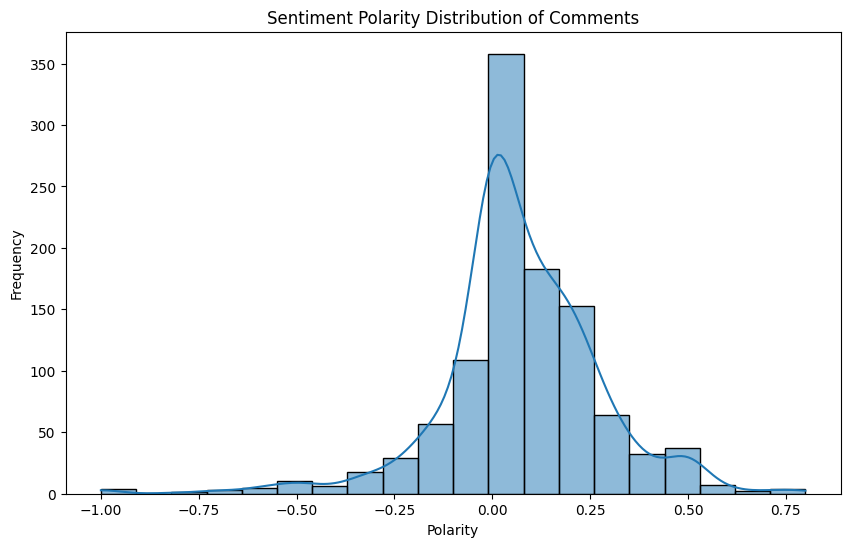

In [12]:
# Plot sentiment polarity distribution
plt.figure(figsize=(10, 6))
sns.histplot(sentiment_df["polarity"], kde=True, bins=20)
plt.title("Sentiment Polarity Distribution of Comments")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()